# Overview

To follow the CRISP-DM process and understand [Reading habit Dataset](https://www.kaggle.com/vipulgote4/reading-habit-dataset), perform EDA and build models to answer (business) questions related to the dataset.

# Environment setup

Import and check library versions

In [1]:
# python
import sys
print("python:", sys.version_info)

# numpy
import numpy as np
print("numpy:", np.version.full_version)

# scipy
import scipy
print("scipy:", scipy.__version__)

# scikit-learn
import sklearn
print("scikit-learn:", sklearn.__version__)

# pandas
import pandas as pd
print("pandas:", pd.__version__)

# matplotlib
import matplotlib
print("matplotlib:", matplotlib.__version__)

# seaborn
import seaborn as sns
print("seaborn:", sns.__version__)

python: sys.version_info(major=3, minor=8, micro=8, releaselevel='final', serial=0)
numpy: 1.20.1
scipy: 1.6.2
scikit-learn: 0.24.1
pandas: 1.2.4
matplotlib: 3.3.4
seaborn: 0.11.1


In [2]:
# suppress warnings
import warnings
warnings.filterwarnings('ignore')

# scipy
from scipy.stats import pearsonr, norm
from scipy import stats

# scikit-learn
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# matplotlib (including special matplotlib argument for improved plots)
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams

from IPython import display

# Kaggle setup

This section shows how to prepare data at ```./reading-habit-dataset/BigML_Dataset_5f50a62795a9306aa200003e.csv```, using Kaggle API.

We can skip this section if we can prepare the data under the same path using other methods.

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

# Upload kaggle.json as per https://www.kaggle.com/general/74235
files.upload()

In [ ]:
 ! mkdir -p ~/.kaggle
 ! mv kaggle.json ~/.kaggle/
 ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list -s "Reading habit Dataset"

In [ ]:
! kaggle datasets download -d vipulgote4/reading-habit-dataset

In [ ]:
! unzip reading-habit-dataset.zip -d reading-habit-dataset

# Read data

In [3]:
df = pd.read_csv('./reading-habit-dataset/BigML_Dataset_5f50a62795a9306aa200003e.csv')

df.rename(columns={
    'Marital status?': 'MaritalStatus',
    'Employement':'Employment',
    'Incomes': 'Income',
    'How many books did you read during last 12months?': 'NumbersBooksLast12months',
    'Read any printed books during last 12months?': 'PrintedBooksLast12months?',
    'Read any audiobooks during last 12months?': 'AudiobooksLast12months?',
    'Read any e-books during last 12months?': 'E-booksLast12months?',
    'Last book you read, you…': 'HowReadLastBook',
    'Do you happen to read any daily news or newspapers?': 'ReadNewspapers?',
    'Do you happen to read any magazines or journals?': 'ReadMagazines?',
    }, inplace=True)

df.head()

,Age,Sex,Race,MaritalStatus,Education,Employment,Income,NumbersBooksLast12months,PrintedBooksLast12months?,AudiobooksLast12months?,E-booksLast12months?,HowReadLastBook,ReadNewspapers?,ReadMagazines?
0,66,Male,Refused,Divorced,College graduate,Retired,"$20,000 to under $30,000",97,Yes,No,Yes,Purchased the book,No,Yes
1,46,Male,Native American/American Indian,Married,High school graduate,Employed full-time,"Less than $10,000",97,Yes,Yes,Yes,Purchased the book,Yes,Yes
2,32,Male,Mixed race,Never been married,High school graduate,Employed full-time,"Less than $10,000",97,No,Yes,Yes,Borrowed the book from a friend or family member,Yes,Yes
3,27,Male,Mixed race,Married,High school graduate,Employed full-time,"$40,000 to under $50,000",97,Yes,No,Yes,Borrowed the book from a library,Yes,No
4,16,Female,Mixed race,Never been married,High school incomplete,Employed part-time,"$10,000 to under $20,000",97,Yes,Yes,No,Purchased the book,Yes,No


# EDA

## rows and columns

In [4]:
num_rows = df.shape[0]
num_cols = df.shape[1]
print(num_rows, num_cols)

2832 14


## no missing values

Which columns have no missing values?

In [5]:
no_null_values = set(df.columns[~df.isnull().any()])

In [6]:
no_null_values

{'Age',
 'Education',
 'Employment',
 'Income',
 'MaritalStatus',
 'NumbersBooksLast12months',
 'Race',
 'ReadMagazines?',
 'ReadNewspapers?',
 'Sex'}

In [7]:
df['Age'].value_counts()

50    78
65    76
60    72
47    70
16    68
      ..
91     3
89     2
90     2
92     2
93     1
Name: Age, Length: 78, dtype: int64

In [8]:
df['Education'].value_counts()

High school graduate                                        688
Some college, no 4-year degree                              651
College graduate                                            597
Post-graduate training/professional school after college    501
High school incomplete                                      263
Technical, trade or vocational school AFTER high school      66
None                                                         58
Don’t know                                                    8
Name: Education, dtype: int64

In [9]:
df['Employment'].value_counts()

Employed full-time                 1238
Retired                             605
Not employed for pay                474
Employed part-time                  355
Disabled                             70
Have own business/self-employed      53
Student                              22
Other                                15
Name: Employment, dtype: int64

In [10]:
df['Income'].value_counts()

$100,000 to under $150,000     530
$50,000 to under $75,000       394
$75,000 to under $100,000      316
Refused                        291
$30,000 to under $40,000       265
$20,000 to under $30,000       238
$10,000 to under $20,000       216
9$100,000 to under $150,000    212
$40,000 to under $50,000       207
Less than $10,000              163
Name: Income, dtype: int64

In [11]:
df['MaritalStatus'].value_counts()

Married                  1532
Never been married        592
Divorced                  245
Widowed                   191
Living with a partner     141
Single                     60
Separated                  54
Don’t know                 17
Name: MaritalStatus, dtype: int64

In [12]:
df['NumbersBooksLast12months'].value_counts().sort_index(ascending=False)

97    124
96     15
90      2
84      1
80      6
76      1
75     14
70     10
67      1
65      2
60     19
55      3
54      1
52      2
51      1
50    108
48      5
47      2
45      7
43      1
42      1
40     53
38      1
37      1
36     16
35     15
32      3
30    109
26      2
25     82
24     35
23      1
22      1
20    159
19      1
18     10
17      6
16     11
15    103
14      9
13     12
12    159
11      4
10    162
9      11
8      69
7      49
6     172
5     167
4     166
3     209
2     169
1     149
0     390
Name: NumbersBooksLast12months, dtype: int64

In [13]:
df['Race'].value_counts()

White                              2217
Black or African-American           347
Asian or Pacific Islander            70
Mixed race                           63
Other                                58
Refused                              37
Native American/American Indian      31
Don’t know                            9
Name: Race, dtype: int64

In [14]:
df['ReadMagazines?'].value_counts()

Yes           1506
No            1322
Don’t know       4
Name: ReadMagazines?, dtype: int64

In [15]:
df['ReadNewspapers?'].value_counts()

Yes           1750
No            1077
Don’t know       5
Name: ReadNewspapers?, dtype: int64

In [16]:
df['Sex'].value_counts()

Female    1479
Male      1353
Name: Sex, dtype: int64

### 'Income' can be cleaned

In [17]:
df['Income'] = df['Income'].map({
    'Refused': '1 - Refused',
    'Less than $10,000': '2 - Less than $10,000', 
    '$10,000 to under $20,000': '3 - $10,000 to under $20,000',
    '$20,000 to under $30,000': '4 - $20,000 to under $30,000',
    '$30,000 to under $40,000': '5 - $30,000 to under $40,000',
    '$40,000 to under $50,000': '6 - $40,000 to under $50,000',
    '$50,000 to under $75,000': '7 - $50,000 to under $75,000',
    '$75,000 to under $100,000': '8 - $75,000 to under $100,000',
    '$100,000 to under $150,000': '9 - $100,000 to under $150,000',
    '9$100,000 to under $150,000': '9 - $100,000 to under $150,000'
})

In [18]:
df['Income'].value_counts().sort_index()

1 - Refused                       291
2 - Less than $10,000             163
3 - $10,000 to under $20,000      216
4 - $20,000 to under $30,000      238
5 - $30,000 to under $40,000      265
6 - $40,000 to under $50,000      207
7 - $50,000 to under $75,000      394
8 - $75,000 to under $100,000     316
9 - $100,000 to under $150,000    742
Name: Income, dtype: int64

## missing values

Which columns have missing values?

In [19]:
null_values = set(df.columns[df.isnull().any()])

In [20]:
null_values

{'AudiobooksLast12months?',
 'E-booksLast12months?',
 'HowReadLastBook',
 'PrintedBooksLast12months?'}

### 'AudiobooksLast12months?'

In [21]:
print('{} missing out of {}'.format(df['AudiobooksLast12months?'].isnull().sum(), num_rows))

390 missing out of 2832


In [22]:
df['AudiobooksLast12months?'].value_counts()

No            2027
Yes            411
Don’t know       4
Name: AudiobooksLast12months?, dtype: int64

Let's keep "Don't know" as it is.

In [23]:
df[df['AudiobooksLast12months?'] == 'Don’t know']

,Age,Sex,Race,MaritalStatus,Education,Employment,Income,NumbersBooksLast12months,PrintedBooksLast12months?,AudiobooksLast12months?,E-booksLast12months?,HowReadLastBook,ReadNewspapers?,ReadMagazines?
74,54,Female,White,Married,College graduate,Employed full-time,1 - Refused,97,Yes,Don’t know,Yes,Borrowed the book from a library,Yes,Yes
434,25,Male,Black or African-American,Never been married,High school graduate,Not employed for pay,"2 - Less than $10,000",30,Yes,Don’t know,Yes,Borrowed the book from a friend or family member,Yes,Yes
1470,61,Female,White,Divorced,"Some college, no 4-year degree",Not employed for pay,"2 - Less than $10,000",6,Yes,Don’t know,Don’t know,Borrowed the book from a friend or family member,Yes,Yes
1768,69,Male,Black or African-American,Married,High school graduate,Retired,"2 - Less than $10,000",4,Yes,Don’t know,No,Borrowed the book from a friend or family member,Yes,No


Looking at the 390 rows, where "AudiobooksLast12months?" is null, we see that 

- 'NumbersBooksLast12months' looks like 0
- "PrintedBooksLast12months?" and "E-booksLast12months?" also look like null.

In [24]:
df[df['AudiobooksLast12months?'].isnull()]

,Age,Sex,Race,MaritalStatus,Education,Employment,Income,NumbersBooksLast12months,PrintedBooksLast12months?,AudiobooksLast12months?,E-booksLast12months?,HowReadLastBook,ReadNewspapers?,ReadMagazines?
2442,69,Male,Refused,Married,High school graduate,Retired,1 - Refused,0,NaN,NaN,NaN,NaN,Yes,No
2443,58,Male,Refused,Don’t know,None,Employed full-time,"2 - Less than $10,000",0,NaN,NaN,NaN,NaN,No,No
2444,72,Male,Other,Married,High school graduate,Retired,"5 - $30,000 to under $40,000",0,NaN,NaN,NaN,NaN,Yes,No
2445,72,Female,Other,Divorced,None,Retired,"9 - $100,000 to under $150,000",0,NaN,NaN,NaN,NaN,No,No
2446,67,Female,Other,Married,None,Not employed for pay,"2 - Less than $10,000",0,NaN,NaN,NaN,NaN,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2827,18,Male,White,Never been married,High school graduate,Employed part-time,"8 - $75,000 to under $100,000",0,NaN,NaN,NaN,NaN,Yes,Yes
2828,17,Male,White,Never been married,High school incomplete,Employed part-time,"5 - $30,000 to under $40,000",0,NaN,NaN,NaN,NaN,Yes,No
2829,17,Female,White,Never been married,High school incomplete,Not employed for pay,"9 - $100,000 to under $150,000",0,NaN,NaN,NaN,NaN,No,Yes
2830,16,Male,White,Never been married,High school graduate,Not employed for pay,"9 - $100,000 to under $150,000",0,NaN,NaN,NaN,NaN,No,No


The people (i.e. dataframe row) whose "NumbersBooksLast12months" are 0, and whose "AudiobooksLast12months?" is null, do match.

It should be OK to replace null values with "No" in this case.

In [25]:
df[df['AudiobooksLast12months?'].isnull()].equals(df[df['NumbersBooksLast12months'] == 0])

True

In [26]:
df['AudiobooksLast12months?'] = df['AudiobooksLast12months?'].fillna('No')

In [27]:
df['AudiobooksLast12months?'].value_counts()

No            2417
Yes            411
Don’t know       4
Name: AudiobooksLast12months?, dtype: int64

### 'E-booksLast12months?'

In [28]:
print('{} missing out of {}'.format(df['E-booksLast12months?'].isnull().sum(), num_rows))

390 missing out of 2832


In [29]:
df['E-booksLast12months?'].value_counts()

No            1641
Yes            787
Don’t know      14
Name: E-booksLast12months?, dtype: int64

In [30]:
df[df['E-booksLast12months?'].isnull()].equals(df[df['NumbersBooksLast12months'] == 0])

True

In [31]:
df['E-booksLast12months?'] = df['E-booksLast12months?'].fillna('No')

In [32]:
df['E-booksLast12months?'].value_counts()

No            2031
Yes            787
Don’t know      14
Name: E-booksLast12months?, dtype: int64

### 'HowReadLastBook'

In [33]:
print('{} missing out of {}'.format(df['HowReadLastBook'].isnull().sum(), num_rows))

390 missing out of 2832


In [34]:
df['HowReadLastBook'].value_counts()

Purchased the book                                  1266
Borrowed the book from a friend or family member     501
Borrowed the book from a library                     335
Got the book some other way                          309
8                                                     25
9                                                      6
Name: HowReadLastBook, dtype: int64

Not sure how the values 8 and 9 came...

Since the people read at least one book, it should be OK to replace these values with "Got the book some other way" in this case.

In [35]:
df[df['HowReadLastBook'].isin(['8', '9'])]

,Age,Sex,Race,MaritalStatus,Education,Employment,Income,NumbersBooksLast12months,PrintedBooksLast12months?,AudiobooksLast12months?,E-booksLast12months?,HowReadLastBook,ReadNewspapers?,ReadMagazines?
148,65,Male,White,Married,Post-graduate training/professional school aft...,Employed part-time,"9 - $100,000 to under $150,000",76,No,No,Yes,8,Yes,Yes
202,66,Male,Refused,Married,College graduate,Employed part-time,"9 - $100,000 to under $150,000",50,Yes,No,No,8,Yes,No
362,42,Male,White,Married,Post-graduate training/professional school aft...,Employed full-time,1 - Refused,40,Yes,Yes,Yes,8,Yes,Yes
586,39,Male,White,Married,College graduate,Employed full-time,"7 - $50,000 to under $75,000",25,Yes,Yes,Yes,8,No,Yes
760,35,Male,White,Married,College graduate,Employed full-time,"8 - $75,000 to under $100,000",20,Yes,Yes,No,8,Yes,No
837,62,Male,Native American/American Indian,Divorced,College graduate,Retired,"6 - $40,000 to under $50,000",15,Yes,Yes,No,9,No,No
859,71,Male,White,Married,Post-graduate training/professional school aft...,Retired,"9 - $100,000 to under $150,000",15,Yes,No,No,8,Yes,No
1006,72,Female,White,Widowed,"Some college, no 4-year degree",Retired,"6 - $40,000 to under $50,000",12,No,Yes,Yes,9,No,Yes
1422,60,Male,Black or African-American,Married,High school graduate,Retired,"5 - $30,000 to under $40,000",6,No,No,No,9,Yes,No
1487,56,Male,White,Married,High school graduate,Employed full-time,"7 - $50,000 to under $75,000",6,Yes,No,No,8,No,Yes


In [36]:
df.replace({
    'HowReadLastBook': {
        '8': 'Got the book some other way',
        '9': 'Got the book some other way'
    }
}, inplace=True)

For the 390 missing values, let's define 'Did not get a book' and convert null to it.

In [37]:
df[df['HowReadLastBook'].isnull()].equals(df[df['NumbersBooksLast12months'] == 0])

True

In [38]:
df['HowReadLastBook'] = df['HowReadLastBook'].fillna('Did not get a book')

In [39]:
df['HowReadLastBook'].value_counts()

Purchased the book                                  1266
Borrowed the book from a friend or family member     501
Did not get a book                                   390
Got the book some other way                          340
Borrowed the book from a library                     335
Name: HowReadLastBook, dtype: int64

### 'PrintedBooksLast12months?'

In [40]:
print('{} missing out of {}'.format(df['PrintedBooksLast12months?'].isnull().sum(), num_rows))

390 missing out of 2832


In [41]:
df['PrintedBooksLast12months?'].value_counts()

Yes           2264
No             168
Don’t know      10
Name: PrintedBooksLast12months?, dtype: int64

In [42]:
df[df['PrintedBooksLast12months?'] == 'Don’t know']

,Age,Sex,Race,MaritalStatus,Education,Employment,Income,NumbersBooksLast12months,PrintedBooksLast12months?,AudiobooksLast12months?,E-booksLast12months?,HowReadLastBook,ReadNewspapers?,ReadMagazines?
196,81,Male,White,Married,High school graduate,Retired,1 - Refused,55,Don’t know,No,No,Got the book some other way,Yes,No
246,62,Female,White,Widowed,None,Employed full-time,"9 - $100,000 to under $150,000",50,Don’t know,No,No,Purchased the book,Yes,No
424,16,Female,Mixed race,Never been married,High school incomplete,Not employed for pay,"6 - $40,000 to under $50,000",30,Don’t know,Yes,No,Borrowed the book from a library,Yes,Yes
996,78,Female,White,Widowed,High school graduate,Retired,"4 - $20,000 to under $30,000",12,Don’t know,No,No,Borrowed the book from a library,Yes,Yes
1122,67,Female,Other,Married,"Some college, no 4-year degree",Retired,1 - Refused,10,Don’t know,No,No,Purchased the book,No,No
1752,51,Female,Other,Married,High school incomplete,Not employed for pay,"9 - $100,000 to under $150,000",4,Don’t know,No,No,Purchased the book,Yes,Yes
1756,16,Female,Other,Never been married,High school incomplete,Student,"9 - $100,000 to under $150,000",4,Don’t know,Yes,Yes,Borrowed the book from a friend or family member,No,Yes
2013,65,Male,White,Married,Post-graduate training/professional school aft...,Retired,"9 - $100,000 to under $150,000",3,Don’t know,Yes,No,Purchased the book,Yes,Yes
2296,41,Male,Native American/American Indian,Married,High school graduate,Employed full-time,"5 - $30,000 to under $40,000",1,Don’t know,No,No,Purchased the book,Yes,No
2434,18,Male,White,Never been married,High school graduate,Not employed for pay,"7 - $50,000 to under $75,000",1,Don’t know,No,No,Borrowed the book from a library,No,No


In [43]:
df[df['PrintedBooksLast12months?'].isnull()].equals(df[df['NumbersBooksLast12months'] == 0])

True

In [44]:
df['PrintedBooksLast12months?'] = df['PrintedBooksLast12months?'].fillna('No')

In [45]:
df['PrintedBooksLast12months?'].value_counts()

Yes           2264
No             558
Don’t know      10
Name: PrintedBooksLast12months?, dtype: int64

## (Now dataframe has no missing values)

In [46]:
set(df.columns[df.isnull().any()])

set()

In [47]:
df.shape

(2832, 14)

In [48]:
df.head()

,Age,Sex,Race,MaritalStatus,Education,Employment,Income,NumbersBooksLast12months,PrintedBooksLast12months?,AudiobooksLast12months?,E-booksLast12months?,HowReadLastBook,ReadNewspapers?,ReadMagazines?
0,66,Male,Refused,Divorced,College graduate,Retired,"4 - $20,000 to under $30,000",97,Yes,No,Yes,Purchased the book,No,Yes
1,46,Male,Native American/American Indian,Married,High school graduate,Employed full-time,"2 - Less than $10,000",97,Yes,Yes,Yes,Purchased the book,Yes,Yes
2,32,Male,Mixed race,Never been married,High school graduate,Employed full-time,"2 - Less than $10,000",97,No,Yes,Yes,Borrowed the book from a friend or family member,Yes,Yes
3,27,Male,Mixed race,Married,High school graduate,Employed full-time,"6 - $40,000 to under $50,000",97,Yes,No,Yes,Borrowed the book from a library,Yes,No
4,16,Female,Mixed race,Never been married,High school incomplete,Employed part-time,"3 - $10,000 to under $20,000",97,Yes,Yes,No,Purchased the book,Yes,No


## distribution

Text(0.5, 1.0, 'Age')

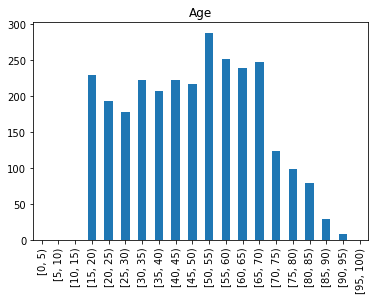

In [49]:
"""
age_vals = df['Age'].value_counts()

#(age_vals/df.shape[0]).plot(kind="bar")
(age_vals/df.shape[0]).plot.hist(bins=20)

plt.title("Age: How old are you?")
"""

pd.cut(df['Age'], range(0, 101, 5), right=False).value_counts(sort=False).plot.bar()
plt.title("Age")

Text(0.5, 1.0, 'Sex')

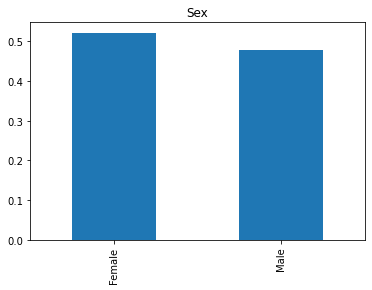

In [50]:
sex_vals = df['Sex'].value_counts()

(sex_vals/df.shape[0]).plot(kind="bar")
plt.title("Sex")

Text(0.5, 1.0, 'Race')

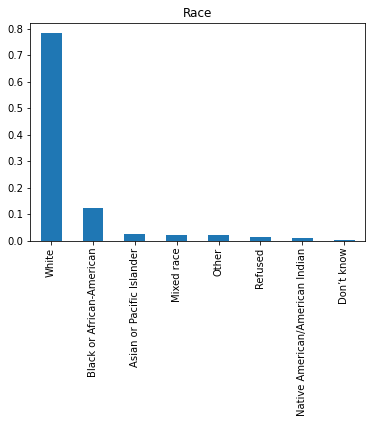

In [51]:
race_vals = df['Race'].value_counts()

(race_vals/df.shape[0]).plot(kind="bar")
plt.title("Race")

Text(0.5, 1.0, 'Marital status')

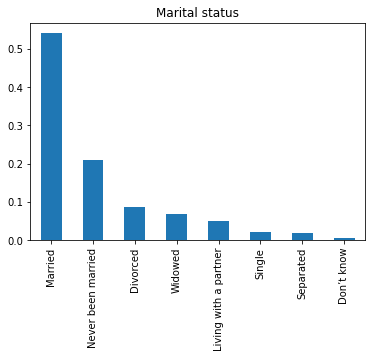

In [52]:
marital_vals = df['MaritalStatus'].value_counts()

(marital_vals/df.shape[0]).plot(kind="bar")
plt.title("Marital status")

Text(0.5, 1.0, 'Education')

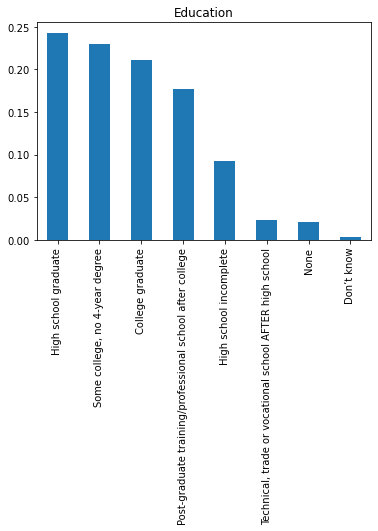

In [53]:
education_vals = df['Education'].value_counts()

(education_vals/df.shape[0]).plot(kind="bar")

plt.title("Education")

Text(0.5, 1.0, 'Employment')

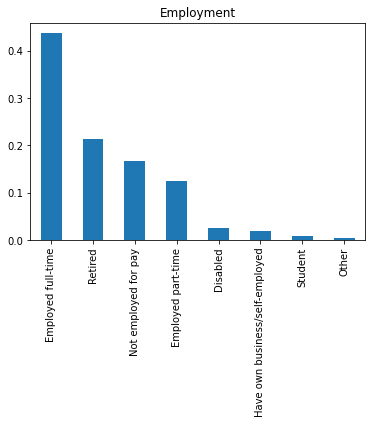

In [54]:
employment_vals = df['Employment'].value_counts()

(employment_vals/df.shape[0]).plot(kind="bar")
plt.title("Employment")

Text(0.5, 1.0, 'Income')

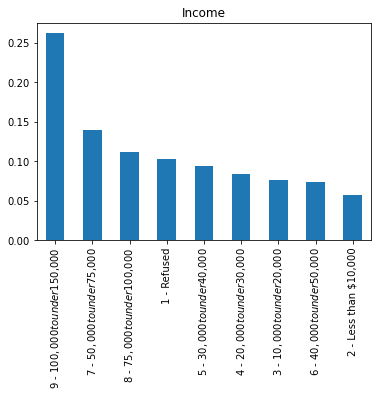

In [55]:
income_vals = df['Income'].value_counts()

(income_vals/df.shape[0]).plot(kind="bar")
plt.title("Income")

Text(0.5, 1.0, 'How many books did you read during last 12months?')

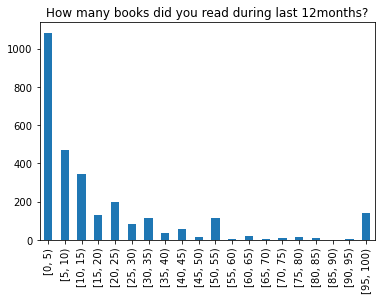

In [56]:
number_books_vals = df['NumbersBooksLast12months'].value_counts()

#(number_books_vals/df.shape[0]).plot(kind="bar")
pd.cut(df['NumbersBooksLast12months'], range(0, 101, 5), right=False).value_counts(sort=False).plot.bar()

plt.title("How many books did you read during last 12months?")

# Dataframe conversion

## categorical values

In [57]:
# 40 Screencast: Categorical Variables Solution
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df


In [58]:
#Pull a list of the column names of the categorical variables
cat_df = df.select_dtypes(include=['object'])
cat_cols_lst = cat_df.columns

In [59]:
cat_cols_lst

Index(['Sex', 'Race', 'MaritalStatus', 'Education', 'Employment', 'Income',
       'PrintedBooksLast12months?', 'AudiobooksLast12months?',
       'E-booksLast12months?', 'HowReadLastBook', 'ReadNewspapers?',
       'ReadMagazines?'],
      dtype='object')

In [60]:
df_onehot = create_dummy_df(df, cat_cols_lst, dummy_na=False)

print(df_onehot.shape)

(2832, 53)


The reasoning of 53:

- Number of unique vaules for each categorical columns. Adding all these becomes 63.
  - Sex: 2
  - Race: 8
  - MaritalStatus: 8
  - Education: 8
  - Employment: 8
  - Income: 9
  - PrintedBooksLast12months?: 3
  - AudiobooksLast12months?: 3
  - E-booksLast12months?: 3
  - HowReadLastBook: 5
  - ReadNewspapers?: 3
  - ReadMagazines?: 3
- 63 - 12 (number of original categorical columns removed by the ```create_dummy_df``` function) + 2 (non categorical columns) = 53


In [61]:
df_onehot.head()

,Age,NumbersBooksLast12months,Sex_Male,Race_Black or African-American,Race_Don’t know,Race_Mixed race,Race_Native American/American Indian,Race_Other,Race_Refused,Race_White,...,E-booksLast12months?_No,E-booksLast12months?_Yes,HowReadLastBook_Borrowed the book from a library,HowReadLastBook_Did not get a book,HowReadLastBook_Got the book some other way,HowReadLastBook_Purchased the book,ReadNewspapers?_No,ReadNewspapers?_Yes,ReadMagazines?_No,ReadMagazines?_Yes
0,66,97,1,0,0,0,0,0,1,0,...,0,1,0,0,0,1,1,0,0,1
1,46,97,1,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,1,0,1
2,32,97,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
3,27,97,1,0,0,1,0,0,0,0,...,0,1,1,0,0,0,0,1,1,0
4,16,97,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,1,0


# Question 1: Is there a statistical relationship between age and number of books during last 12 months?

Answer: No. Given the sample size (2832), and the small p-value (0.0034...), I conclude that age and number of books do not have statistical relationship.

The columns 'Age' and 'NumbersBooksLast12months' have no null values.

In [62]:
'Age' in no_null_values and 'NumbersBooksLast12months' in no_null_values

True

In [63]:
pearsoncorr = df.corr(method='pearson')
pearsoncorr

,Age,NumbersBooksLast12months
Age,1.000000,0.054968
NumbersBooksLast12months,0.054968,1.000000


<AxesSubplot:>

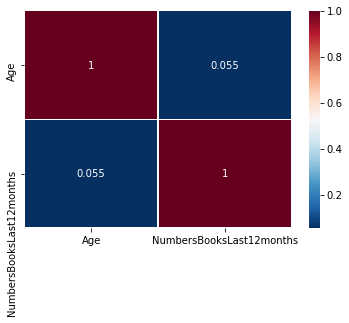

In [64]:
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

[scipy.stats.pearsonr](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html) provides Pearson correlation coefficient and p-value for testing non-correlation.

In [65]:
pearsonr(df['Age'], df['NumbersBooksLast12months'])

(0.054968017789002135, 0.0034320905858606678)

# Question 2: Then, what relates the most to the number of books each person has read during last 12 months?

Answer: after removing 'NumbersBooksLast12months' outliers and converting the column to log scale, the following features seem to have more impact to 'NumbersBooksLast12months' than others.

```
E-booksLast12months?_Yes                                              0.245180
ReadMagazines?_Yes                                                    0.151486
Education_Post-graduate training/professional school after college    0.140139
AudiobooksLast12months?_Yes                                           0.139018
```

But none of the features showed strong relationship with the target 'NumbersBooksLast12months' variable, thus unable to build a regression model that explains it well.

- Decision tree based models showed strong overfitting
- other models showed very high MSE and very low R2 score (probably underfitting) 

In [66]:
current_figsize = rcParams['figure.figsize']
print(current_figsize)

[6.0, 4.0]


<AxesSubplot:>

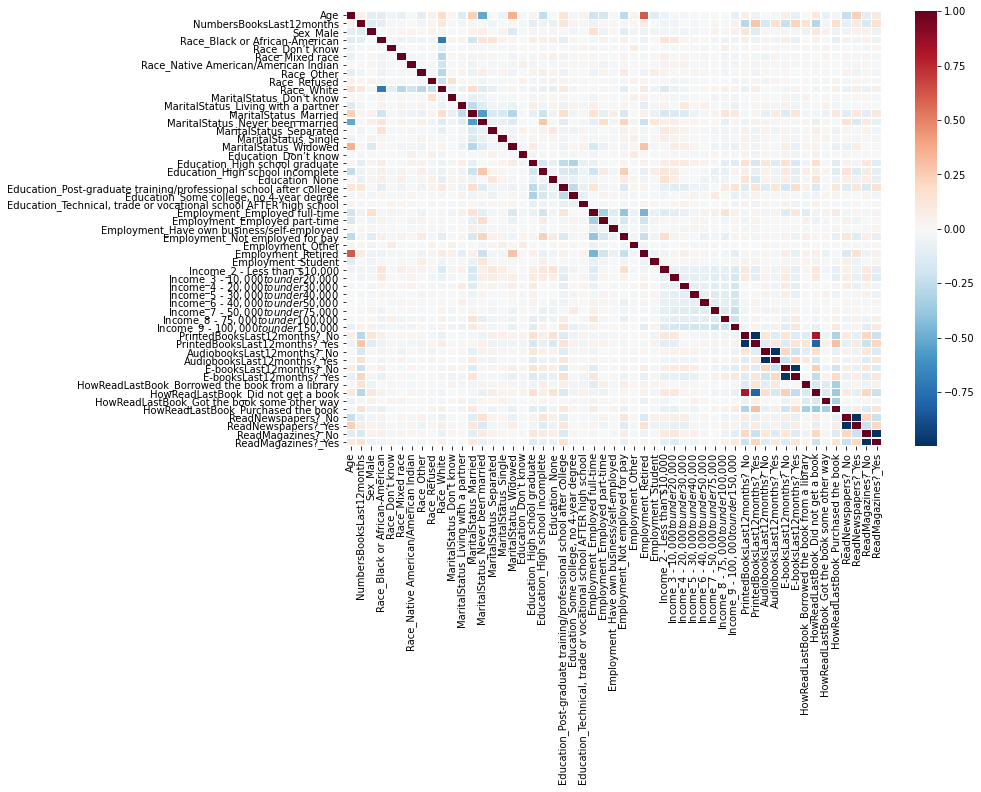

In [67]:
pearsoncorr_onehot = df_onehot.corr(method='pearson')

plt.figure(figsize=(12, 8))
sns.heatmap(pearsoncorr_onehot, 
            xticklabels=pearsoncorr_onehot.columns,
            yticklabels=pearsoncorr_onehot.columns,
            cmap='RdBu_r',
            #annot=True,
            linewidth=0.5)

However, here we see that no parameter seems to be strongly relevant to 'NumbersBooksLast12months'.

In [68]:
pearsoncorr_onehot.sort_values(['NumbersBooksLast12months'], ascending = False).NumbersBooksLast12months # inplace = True

NumbersBooksLast12months                                              1.000000
PrintedBooksLast12months?_Yes                                         0.277341
E-booksLast12months?_Yes                                              0.225282
AudiobooksLast12months?_Yes                                           0.160553
HowReadLastBook_Purchased the book                                    0.158795
ReadMagazines?_Yes                                                    0.157135
HowReadLastBook_Borrowed the book from a library                      0.142918
Education_Post-graduate training/professional school after college    0.118949
Race_White                                                            0.110435
ReadNewspapers?_Yes                                                   0.086231
Employment_Retired                                                    0.079811
Age                                                                   0.054968
Income_9 - $100,000 to under $150,000               

## In the search for normality

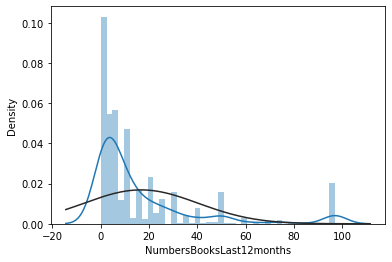

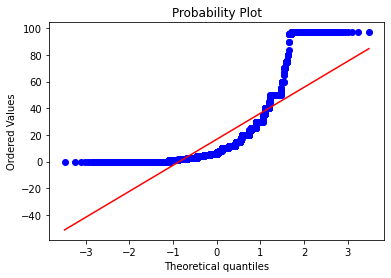

In [69]:
# histogram and normal probability plot
sns.distplot(df_onehot['NumbersBooksLast12months'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_onehot['NumbersBooksLast12months'], plot=plt)

In [70]:
# skewness and kurtosis
print("Skewness: %f" % df_onehot['NumbersBooksLast12months'].skew())
print("Kurtosis: %f" % df_onehot['NumbersBooksLast12months'].kurt())

Skewness: 2.204948
Kurtosis: 4.393563


We see that the distribution deviates from the normal distribution (first graph). And it does not follow the diagonal line (second graph). The author tried logarithm transformation to see if it brings us better fit to the normal distribution (lower Skewness and Kurtosis).

In [71]:
df_onehot_numberbook_nooutlier = df_onehot.copy()

In [72]:
df_onehot_numberbook_nooutlier = df_onehot_numberbook_nooutlier[
    ~df_onehot_numberbook_nooutlier['NumbersBooksLast12months'].isin([0, 97])
]

In [73]:
df_onehot_numberbook_nooutlier.shape

(2318, 53)

In [74]:
df_onehot_numberbook_nooutlier.head()

,Age,NumbersBooksLast12months,Sex_Male,Race_Black or African-American,Race_Don’t know,Race_Mixed race,Race_Native American/American Indian,Race_Other,Race_Refused,Race_White,...,E-booksLast12months?_No,E-booksLast12months?_Yes,HowReadLastBook_Borrowed the book from a library,HowReadLastBook_Did not get a book,HowReadLastBook_Got the book some other way,HowReadLastBook_Purchased the book,ReadNewspapers?_No,ReadNewspapers?_Yes,ReadMagazines?_No,ReadMagazines?_Yes
124,64,96,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,1
125,40,96,1,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,1
126,67,96,1,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,1,0,1
127,66,96,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,1
128,65,96,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0,1,0,0,1


In [75]:
# applying log transformation
df_onehot_numberbook_nooutlier['NumbersBooksLast12months'] = np.log(df_onehot_numberbook_nooutlier['NumbersBooksLast12months'])

In [76]:
df_onehot_numberbook_nooutlier.head()

,Age,NumbersBooksLast12months,Sex_Male,Race_Black or African-American,Race_Don’t know,Race_Mixed race,Race_Native American/American Indian,Race_Other,Race_Refused,Race_White,...,E-booksLast12months?_No,E-booksLast12months?_Yes,HowReadLastBook_Borrowed the book from a library,HowReadLastBook_Did not get a book,HowReadLastBook_Got the book some other way,HowReadLastBook_Purchased the book,ReadNewspapers?_No,ReadNewspapers?_Yes,ReadMagazines?_No,ReadMagazines?_Yes
124,64,4.564348,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,1
125,40,4.564348,1,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,1
126,67,4.564348,1,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,1,0,1
127,66,4.564348,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,1
128,65,4.564348,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0,1,0,0,1


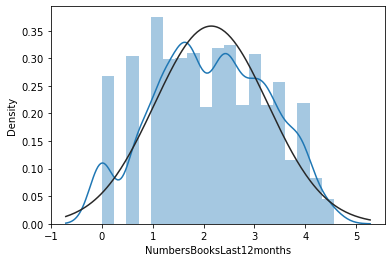

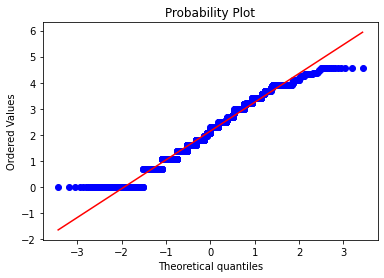

In [77]:
# histogram and normal probability plot
sns.distplot(df_onehot_numberbook_nooutlier['NumbersBooksLast12months'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_onehot_numberbook_nooutlier['NumbersBooksLast12months'], plot=plt)

In [78]:
# skewness and kurtosis
print("Skewness: %f" % df_onehot_numberbook_nooutlier['NumbersBooksLast12months'].skew())
print("Kurtosis: %f" % df_onehot_numberbook_nooutlier['NumbersBooksLast12months'].kurt())

Skewness: -0.042628
Kurtosis: -0.730920


Now Skewness and Kurtosis have improved. Check the correlation again.

<AxesSubplot:>

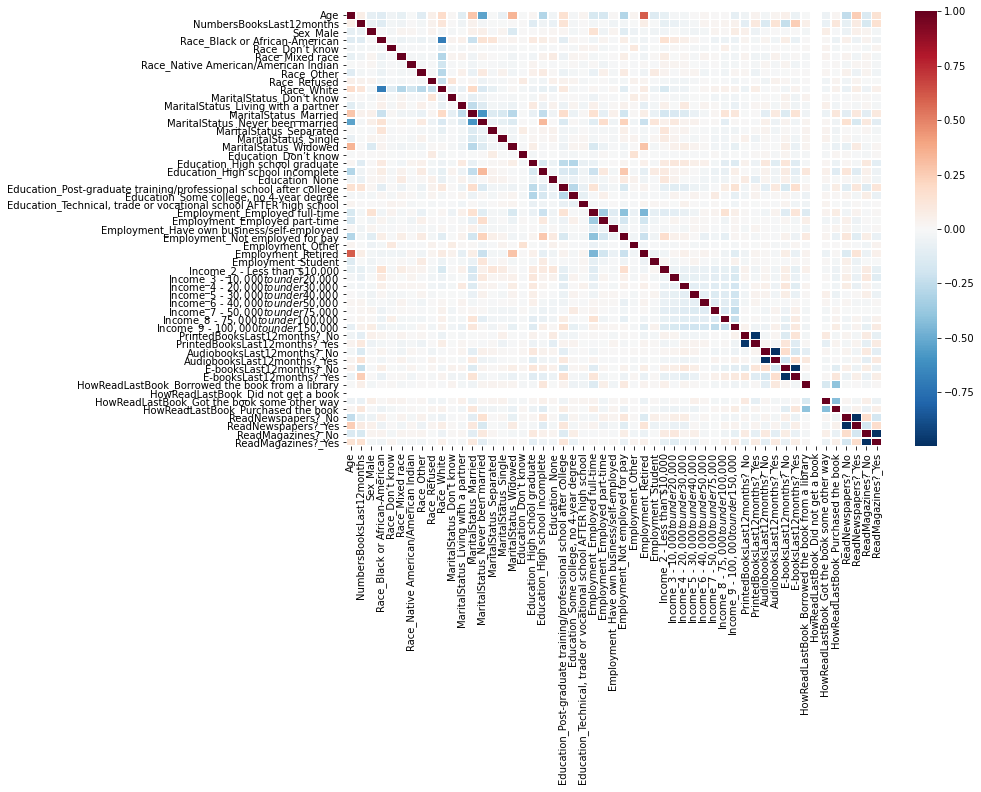

In [79]:
pearsoncorr_onehot_numberbook_nooutlier = df_onehot_numberbook_nooutlier.corr(method='pearson')

plt.figure(figsize=(12, 8))
sns.heatmap(pearsoncorr_onehot_numberbook_nooutlier, 
            xticklabels=pearsoncorr_onehot_numberbook_nooutlier.columns,
            yticklabels=pearsoncorr_onehot_numberbook_nooutlier.columns,
            cmap='RdBu_r',
            #annot=True,
            linewidth=0.5)

We still don't find the features which have strong impact on 'NumbersBooksLast12months', but let's continue for now.

In [80]:
pearsoncorr_onehot_numberbook_nooutlier.sort_values(['NumbersBooksLast12months'], ascending = False).NumbersBooksLast12months # inplace = True

NumbersBooksLast12months                                              1.000000
E-booksLast12months?_Yes                                              0.245180
ReadMagazines?_Yes                                                    0.151486
Education_Post-graduate training/professional school after college    0.140139
AudiobooksLast12months?_Yes                                           0.139018
Race_White                                                            0.123641
HowReadLastBook_Purchased the book                                    0.111387
PrintedBooksLast12months?_Yes                                         0.096017
ReadNewspapers?_Yes                                                   0.083470
Employment_Retired                                                    0.069637
Age                                                                   0.066304
HowReadLastBook_Borrowed the book from a library                      0.061997
MaritalStatus_Married                               

## Building regression models

Let's continue the analysis with the log-transformed dataset.

In [81]:
df_onehot_numberbook_nooutlier.shape

(2318, 53)

In [82]:
df_onehot_numberbook_nooutlier.head()

,Age,NumbersBooksLast12months,Sex_Male,Race_Black or African-American,Race_Don’t know,Race_Mixed race,Race_Native American/American Indian,Race_Other,Race_Refused,Race_White,...,E-booksLast12months?_No,E-booksLast12months?_Yes,HowReadLastBook_Borrowed the book from a library,HowReadLastBook_Did not get a book,HowReadLastBook_Got the book some other way,HowReadLastBook_Purchased the book,ReadNewspapers?_No,ReadNewspapers?_Yes,ReadMagazines?_No,ReadMagazines?_Yes
124,64,4.564348,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,1
125,40,4.564348,1,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,1
126,67,4.564348,1,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,1,0,1
127,66,4.564348,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,1
128,65,4.564348,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0,1,0,0,1


In [83]:
# Split into explanatory and response variables
X = df_onehot_numberbook_nooutlier.drop('NumbersBooksLast12months', axis=1)
y = pd.DataFrame(df_onehot_numberbook_nooutlier['NumbersBooksLast12months'])

In [84]:
print(X.shape, y.shape)

(2318, 52) (2318, 1)


In [85]:
y.describe()

,NumbersBooksLast12months
count,2318.000000
mean,2.149909
std,1.113503
min,0.000000
25%,1.386294
50%,2.197225
75%,2.995732
max,4.564348


### Stratified split for regression

The aim of stratified split is to make train/validation/test split while keeping class distribution from original data.
In order to apply this concept to regression problem, we need to pseudo-label continous target.

https://www.kaggle.com/youhanlee/stratified-sampling-for-regression-lb-1-4627


In [119]:
y['NumbersBooksLast12months_quantile_10'] = pd.qcut(y['NumbersBooksLast12months'],
                                                 q=10,
                                                 labels=False)

In [131]:
y['NumbersBooksLast12months_quantile_5'] = pd.qcut(y['NumbersBooksLast12months'],
                                                 q=5,
                                                 labels=False)

In [137]:
y.head()

,NumbersBooksLast12months,NumbersBooksLast12months_quantile_10,NumbersBooksLast12months_quantile_5
124,4.564348,9,4
125,4.564348,9,4
126,4.564348,9,4
127,4.564348,9,4
128,4.564348,9,4


In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, 
                                                    stratify=y['NumbersBooksLast12months_quantile_5'])
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1854, 52)
(464, 52)
(1854, 3)
(464, 3)


In [139]:
y_test.head()

,NumbersBooksLast12months,NumbersBooksLast12months_quantile_10,NumbersBooksLast12months_quantile_5
838,2.708050,6,3
1682,1.609438,2,1
1601,1.609438,2,1
2179,0.693147,0,0
441,3.401197,8,4


In [140]:
y_train['NumbersBooksLast12months_quantile_5'].value_counts()

0    421
1    404
2    363
3    344
4    322
Name: NumbersBooksLast12months_quantile_5, dtype: int64

In [141]:
y_test['NumbersBooksLast12months_quantile_5'].value_counts()

0    106
1    101
2     91
3     86
4     80
Name: NumbersBooksLast12months_quantile_5, dtype: int64

### Linear regression

In [142]:
linreg = LinearRegression(normalize=True)

linreg.fit(X_train, y_train['NumbersBooksLast12months'])
scores_linreg = cross_val_score(linreg, X_train, y_train['NumbersBooksLast12months'], cv=5)

print("Cross-validation scores (Linear regression): {}".format(scores_linreg))
print("Average cross-validation score (Linear regression): {}".format(scores_linreg.mean()))

Cross-validation scores (Linear regression): [0.13106891 0.11830672 0.11550871 0.0703612  0.09883932]
Average cross-validation score (Linear regression): 0.10681697073070211


Text(0.5, 1.0, 'Actual vs Predicted NumbersBooksLast12months [log]: $Y_i$ vs $\\hat{Y}_i$')

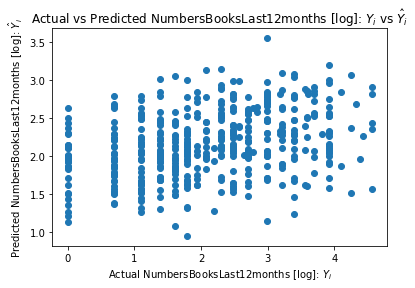

In [143]:
y_pred_linreg = linreg.predict(X_test)

plt.scatter(y_test['NumbersBooksLast12months'], y_pred_linreg)

plt.xlabel("Actual NumbersBooksLast12months [log]: $Y_i$")
plt.ylabel("Predicted NumbersBooksLast12months [log]: $\hat{Y}_i$")
plt.title("Actual vs Predicted NumbersBooksLast12months [log]: $Y_i$ vs $\hat{Y}_i$")

In [144]:
mse_linreg = sklearn.metrics.mean_squared_error(y_test['NumbersBooksLast12months'], y_pred_linreg)
print(mse_linreg)

1.1034967122045716


In [145]:
print(linreg.score(X_train, y_train['NumbersBooksLast12months']))
print(linreg.score(X_test, y_test['NumbersBooksLast12months']))

0.16338206453440085
0.11250574957287562


#### (Reference: No stratify)

In [ ]:
"""
linreg = LinearRegression(normalize=True)

linreg.fit(X_train, y_train)
scores_linreg = cross_val_score(linreg, X_train, y_train, cv=5)

print("Cross-validation scores (Linear regression): {}".format(scores_linreg))
print("Average cross-validation score (Linear regression): {}".format(scores_linreg.mean()))
"""

"""
Cross-validation scores (Linear regression): [ 0.11721253  0.1109863  -0.00984587  0.11388003  0.07607876]
Average cross-validation score (Linear regression): 0.08166234943318045
"""

In [ ]:
"""
y_pred_linreg = linreg.predict(X_test)

plt.scatter(y_test['NumbersBooksLast12months'], y_pred_linreg)

plt.xlabel("Actual NumbersBooksLast12months [log]: $Y_i$")
plt.ylabel("Predicted NumbersBooksLast12months [log]: $\hat{Y}_i$")
plt.title("Actual vs Predicted NumbersBooksLast12months [log]: $Y_i$ vs $\hat{Y}_i$")
"""

In [ ]:
"""
mse_linreg = sklearn.metrics.mean_squared_error(y_test, y_pred_linreg)
print(mse_linreg)
"""

"""
1.039965347426913
"""

In [ ]:
"""
print(linreg.score(X_train, y_train))
print(linreg.score(X_test, y_test))
"""

"""
0.15196641884541517
0.14791851290720914
"""

### K neighbors regression

In [147]:
kneireg = KNeighborsRegressor(n_neighbors=3)

kneireg.fit(X_train, y_train['NumbersBooksLast12months'])
scores_kneireg = cross_val_score(kneireg, X_train, y_train['NumbersBooksLast12months'], cv=5)
print("Cross-validation scores (K neighbor regression): {}".format(scores_kneireg))
print("Average cross-validation score (K neighbor regression): {}".format(scores_kneireg.mean()))

Cross-validation scores (K neighbor regression): [-0.04487686 -0.12088501 -0.22642414 -0.24210482 -0.20320383]
Average cross-validation score (K neighbor regression): -0.1674989310124729


Text(0.5, 1.0, 'Actual vs Predicted NumbersBooksLast12months [log]: $Y_i$ vs $\\hat{Y}_i$')

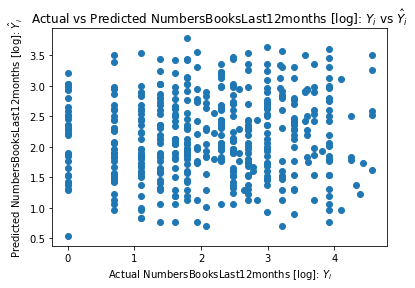

In [148]:
y_pred_kneireg = kneireg.predict(X_test)

plt.scatter(y_test['NumbersBooksLast12months'], y_pred_kneireg)

plt.xlabel("Actual NumbersBooksLast12months [log]: $Y_i$")
plt.ylabel("Predicted NumbersBooksLast12months [log]: $\hat{Y}_i$")
plt.title("Actual vs Predicted NumbersBooksLast12months [log]: $Y_i$ vs $\hat{Y}_i$")

In [149]:
mse_kneireg = sklearn.metrics.mean_squared_error(y_test['NumbersBooksLast12months'], y_pred_kneireg)
print(mse_kneireg)

1.5636947510149433


In [150]:
print(kneireg.score(X_train, y_train['NumbersBooksLast12months']))
print(kneireg.score(X_test, y_test['NumbersBooksLast12months']))

0.41501900205566555
-0.25761145058270407


#### (Reference: No stratify)

In [ ]:
"""
kneireg = KNeighborsRegressor(n_neighbors=3)

kneireg.fit(X_train, y_train)
scores_kneireg = cross_val_score(kneireg, X_train, y_train, cv=5)
print("Cross-validation scores (K neighbor regression): {}".format(scores_kneireg))
print("Average cross-validation score (K neighbor regression): {}".format(scores_kneireg.mean()))
"""

"""
Cross-validation scores (K neighbor regression): [-0.0984141  -0.19270935 -0.14287239 -0.23776682 -0.26453216]
Average cross-validation score (K neighbor regression): -0.18725896632524136
"""

In [ ]:
"""
y_pred_kneireg = kneireg.predict(X_test)

plt.scatter(y_test['NumbersBooksLast12months'], y_pred_kneireg)

plt.xlabel("Actual NumbersBooksLast12months [log]: $Y_i$")
plt.ylabel("Predicted NumbersBooksLast12months [log]: $\hat{Y}_i$")
plt.title("Actual vs Predicted NumbersBooksLast12months [log]: $Y_i$ vs $\hat{Y}_i$")
"""

In [ ]:
"""
mse_kneireg = sklearn.metrics.mean_squared_error(y_test, y_pred_kneireg)
print(mse_kneireg)
"""

"""
1.5203388696488498
"""

In [ ]:
"""
print(kneireg.score(X_train, y_train))
print(kneireg.score(X_test, y_test))
"""

"""
0.4031493616248826
-0.2456690101651744
"""

### Ridge regression (L2)

In [151]:
# alpha=1.0 default
ridgereg = Ridge(alpha=1.0)

ridgereg.fit(X_train, y_train['NumbersBooksLast12months'])
scores_ridgereg = cross_val_score(ridgereg, X_train, y_train['NumbersBooksLast12months'], cv=5)
print("Cross-validation scores (Ridge regression): {}".format(scores_ridgereg))
print("Average cross-validation score (Ridge regression): {}".format(scores_ridgereg.mean()))
print("Number of features used: {}".format(np.sum(ridgereg.coef_ != 0)))

Cross-validation scores (Ridge regression): [0.13717753 0.120875   0.11739406 0.07517613 0.10456551]
Average cross-validation score (Ridge regression): 0.11103764266125611
Number of features used: 51


Text(0.5, 1.0, 'Actual vs Predicted NumbersBooksLast12months [log]: $Y_i$ vs $\\hat{Y}_i$')

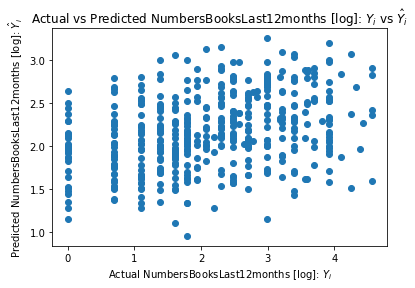

In [152]:
y_pred_ridgereg = ridgereg.predict(X_test)

plt.scatter(y_test['NumbersBooksLast12months'], y_pred_ridgereg)

plt.xlabel("Actual NumbersBooksLast12months [log]: $Y_i$")
plt.ylabel("Predicted NumbersBooksLast12months [log]: $\hat{Y}_i$")
plt.title("Actual vs Predicted NumbersBooksLast12months [log]: $Y_i$ vs $\hat{Y}_i$")

In [153]:
mse_ridgereg = sklearn.metrics.mean_squared_error(y_test['NumbersBooksLast12months'], y_pred_ridgereg)
print(mse_ridgereg)

1.1024579889054869


In [154]:
print(ridgereg.score(X_train, y_train['NumbersBooksLast12months']))
print(ridgereg.score(X_test, y_test['NumbersBooksLast12months']))

0.16297050695156112
0.11334114939376017


#### (Reference: No stratify)

In [ ]:
"""
# alpha=1.0 default
ridgereg = Ridge(alpha=1.0)

ridgereg.fit(X_train, y_train)
scores_ridgereg = cross_val_score(ridgereg, X_train, y_train, cv=5)
print("Cross-validation scores (Ridge regression): {}".format(scores_ridgereg))
print("Average cross-validation score (Ridge regression): {}".format(scores_ridgereg.mean()))
print("Number of features used: {}".format(np.sum(ridgereg.coef_ != 0)))
"""

"""
Cross-validation scores (Ridge regression): [0.12818166 0.11357972 0.01556783 0.11854049 0.07764037]
Average cross-validation score (Ridge regression): 0.09070201256016393
Number of features used: 51
"""

In [ ]:
"""
y_pred_ridgereg = ridgereg.predict(X_test)

plt.scatter(y_test['NumbersBooksLast12months'], y_pred_ridgereg)

plt.xlabel("Actual NumbersBooksLast12months [log]: $Y_i$")
plt.ylabel("Predicted NumbersBooksLast12months [log]: $\hat{Y}_i$")
plt.title("Actual vs Predicted NumbersBooksLast12months [log]: $Y_i$ vs $\hat{Y}_i$")
"""

In [ ]:
"""
mse_ridgereg = sklearn.metrics.mean_squared_error(y_test, y_pred_ridgereg)
print(mse_ridgereg)
"""

"""
1.0380488995850319
"""

In [ ]:
"""
print(ridgereg.score(X_train, y_train))
print(ridgereg.score(X_test, y_test))
"""

"""
0.15158192979301333
0.14948872842553018
"""

### Lasso regression (L1)

In [155]:
# alpha=1.0 default
lassoreg = Lasso(alpha=0.01)

lassoreg.fit(X_train, y_train['NumbersBooksLast12months'])
scores_lassoreg = cross_val_score(lassoreg, X_train, y_train['NumbersBooksLast12months'], cv=5)
print("Cross-validation scores (Lasso regression): {}".format(scores_lassoreg))
print("Average cross-validation score (Lasso regression): {}".format(scores_lassoreg.mean()))
print("Number of features used: {}".format(np.sum(lassoreg.coef_ != 0)))

Cross-validation scores (Lasso regression): [0.13488965 0.11770418 0.11317689 0.09483288 0.12561098]
Average cross-validation score (Lasso regression): 0.11724291383705136
Number of features used: 20


Text(0.5, 1.0, 'Actual vs Predicted NumbersBooksLast12months [log]: $Y_i$ vs $\\hat{Y}_i$')

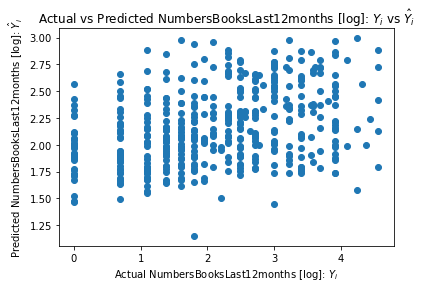

In [156]:
y_pred_lassoreg = lassoreg.predict(X_test)

plt.scatter(y_test['NumbersBooksLast12months'], y_pred_lassoreg)

plt.xlabel("Actual NumbersBooksLast12months [log]: $Y_i$")
plt.ylabel("Predicted NumbersBooksLast12months [log]: $\hat{Y}_i$")
plt.title("Actual vs Predicted NumbersBooksLast12months [log]: $Y_i$ vs $\hat{Y}_i$")

In [157]:
mse_lassoreg = sklearn.metrics.mean_squared_error(y_test['NumbersBooksLast12months'], y_pred_lassoreg)
print(mse_lassoreg)

1.0969967401023843


In [158]:
print(lassoreg.score(X_train, y_train['NumbersBooksLast12months']))
print(lassoreg.score(X_test, y_test['NumbersBooksLast12months']))

0.13898690771177125
0.11773339348411405


#### (Reference: No stratify)

In [ ]:
"""
# alpha=1.0 default
lassoreg = Lasso(alpha=0.01)

lassoreg.fit(X_train, y_train)
scores_lassoreg = cross_val_score(lassoreg, X_train, y_train, cv=5)
print("Cross-validation scores (Lasso regression): {}".format(scores_lassoreg))
print("Average cross-validation score (Lasso regression): {}".format(scores_lassoreg.mean()))
print("Number of features used: {}".format(np.sum(lassoreg.coef_ != 0)))
"""

"""
Cross-validation scores (Lasso regression): [0.14575683 0.12447438 0.05297835 0.11813476 0.08813801]
Average cross-validation score (Lasso regression): 0.10589646627919166
Number of features used: 17
"""

In [ ]:
"""
y_pred_lassoreg = lassoreg.predict(X_test)

plt.scatter(y_test['NumbersBooksLast12months'], y_pred_lassoreg)

plt.xlabel("Actual NumbersBooksLast12months [log]: $Y_i$")
plt.ylabel("Predicted NumbersBooksLast12months [log]: $\hat{Y}_i$")
plt.title("Actual vs Predicted NumbersBooksLast12months [log]: $Y_i$ vs $\hat{Y}_i$")
"""

In [ ]:
"""
mse_lassoreg = sklearn.metrics.mean_squared_error(y_test, y_pred_lassoreg)
print(mse_lassoreg)
"""

"""
1.0417116344028927
"""

In [ ]:
"""
print(lassoreg.score(X_train, y_train))
print(lassoreg.score(X_test, y_test))
"""

"""
0.1288344682821586
0.14648771638397406
"""

### Decision tree regression

In [159]:
# max_depth
dtreereg = DecisionTreeRegressor(random_state=0)

dtreereg.fit(X_train, y_train['NumbersBooksLast12months'])
scores_dtreereg = cross_val_score(dtreereg, X_train, y_train['NumbersBooksLast12months'], cv=5)
print("Cross-validation scores (Decision tree regression): {}".format(scores_dtreereg))
print("Average cross-validation score (Decision tree regression): {}".format(scores_dtreereg.mean()))

Cross-validation scores (Decision tree regression): [-0.72977726 -0.7606348  -0.76960204 -0.69395464 -0.85831442]
Average cross-validation score (Decision tree regression): -0.7624566321111967


Text(0.5, 1.0, 'Actual vs Predicted NumbersBooksLast12months [log]: $Y_i$ vs $\\hat{Y}_i$')

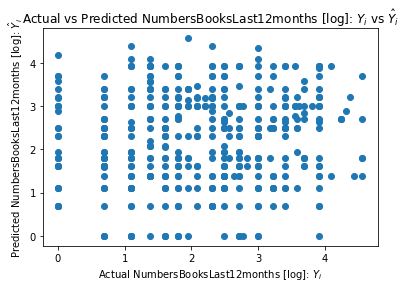

In [160]:
y_pred_dtreereg = dtreereg.predict(X_test)

plt.scatter(y_test['NumbersBooksLast12months'], y_pred_dtreereg)

plt.xlabel("Actual NumbersBooksLast12months [log]: $Y_i$")
plt.ylabel("Predicted NumbersBooksLast12months [log]: $\hat{Y}_i$")
plt.title("Actual vs Predicted NumbersBooksLast12months [log]: $Y_i$ vs $\hat{Y}_i$")

In [161]:
mse_dtreereg = sklearn.metrics.mean_squared_error(y_test['NumbersBooksLast12months'], y_pred_dtreereg)
print(mse_dtreereg)

2.211161833470268


In [162]:
print(dtreereg.score(X_train, y_train['NumbersBooksLast12months']))
print(dtreereg.score(X_test, y_test['NumbersBooksLast12months']))

0.9968370649329368
-0.7783409703580193


#### (Reference: No stratify)

In [ ]:
"""
# max_depth
dtreereg = DecisionTreeRegressor(random_state=0)

dtreereg.fit(X_train, y_train)
scores_dtreereg = cross_val_score(dtreereg, X_train, y_train, cv=5)
print("Cross-validation scores (Decision tree regression): {}".format(scores_dtreereg))
print("Average cross-validation score (Decision tree regression): {}".format(scores_dtreereg.mean()))
"""

"""
Cross-validation scores (Decision tree regression): [-0.70918954 -0.77762396 -0.77230797 -1.06882826 -0.72350334]
Average cross-validation score (Decision tree regression): -0.8102906167650221
"""

In [ ]:
"""
y_pred_dtreereg = dtreereg.predict(X_test)

plt.scatter(y_test['NumbersBooksLast12months'], y_pred_dtreereg)

plt.xlabel("Actual NumbersBooksLast12months [log]: $Y_i$")
plt.ylabel("Predicted NumbersBooksLast12months [log]: $\hat{Y}_i$")
plt.title("Actual vs Predicted NumbersBooksLast12months [log]: $Y_i$ vs $\hat{Y}_i$")
"""

In [ ]:
"""
mse_dtreereg = sklearn.metrics.mean_squared_error(y_test, y_pred_dtreereg)
print(mse_dtreereg)
"""

"""
2.177711531294585
"""

In [ ]:
"""
print(dtreereg.score(X_train, y_train))
print(dtreereg.score(X_test, y_test))
"""

"""
0.9967408317930903
-0.7842783748859634
"""

### Ensemble methods (Random Forest)

In [163]:
# default: n_estimators=10, max_features='auto' (which means, n_features), n_jobs=1
rfreg = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=0)
rfreg.fit(X_train, y_train['NumbersBooksLast12months'])

scores_rfreg = cross_val_score(rfreg, X_train, y_train['NumbersBooksLast12months'], cv=5)
print("Cross-validation scores (Random forest regression): {}".format(scores_rfreg))
print("Average cross-validation score (Random forest regression): {}".format(scores_rfreg.mean()))

Cross-validation scores (Random forest regression): [ 0.10325984  0.06299294  0.05054761 -0.00476972  0.04423211]
Average cross-validation score (Random forest regression): 0.051252555674346986


Text(0.5, 1.0, 'Actual vs Predicted NumbersBooksLast12months [log]: $Y_i$ vs $\\hat{Y}_i$')

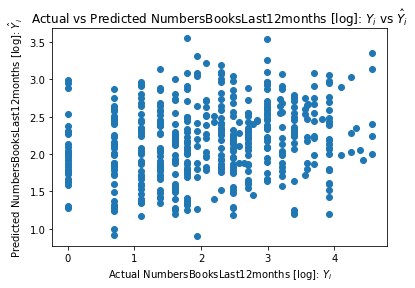

In [164]:
y_pred_rfreg = rfreg.predict(X_test)

plt.scatter(y_test['NumbersBooksLast12months'], y_pred_rfreg)

plt.xlabel("Actual NumbersBooksLast12months [log]: $Y_i$")
plt.ylabel("Predicted NumbersBooksLast12months [log]: $\hat{Y}_i$")
plt.title("Actual vs Predicted NumbersBooksLast12months [log]: $Y_i$ vs $\hat{Y}_i$")

In [165]:
mse_rfreg = sklearn.metrics.mean_squared_error(y_test['NumbersBooksLast12months'], y_pred_rfreg)
print(mse_rfreg)

1.2494459014243717


In [166]:
print(rfreg.score(X_train, y_train['NumbersBooksLast12months']))
print(rfreg.score(X_test, y_test['NumbersBooksLast12months']))

0.863010263693105
-0.004874814278827522


#### (Reference: No stratify)

In [ ]:
"""
# default: n_estimators=10, max_features='auto' (which means, n_features), n_jobs=1
rfreg = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=0)
rfreg.fit(X_train, y_train)

scores_rfreg = cross_val_score(rfreg, X_train, y_train, cv=5)
print("Cross-validation scores (Random forest regression): {}".format(scores_rfreg))
print("Average cross-validation score (Random forest regression): {}".format(scores_rfreg.mean()))
"""

"""
Cross-validation scores (Random forest regression): [0.0961888  0.05124092 0.03794049 0.00109345 0.01724099]
Average cross-validation score (Random forest regression): 0.04074092793986859
"""

In [ ]:
"""
y_pred_rfreg = rfreg.predict(X_test)

plt.scatter(y_test['NumbersBooksLast12months'], y_pred_rfreg)

plt.xlabel("Actual NumbersBooksLast12months [log]: $Y_i$")
plt.ylabel("Predicted NumbersBooksLast12months [log]: $\hat{Y}_i$")
plt.title("Actual vs Predicted NumbersBooksLast12months [log]: $Y_i$ vs $\hat{Y}_i$")
"""

In [ ]:
"""
mse_rfreg = sklearn.metrics.mean_squared_error(y_test, y_pred_rfreg)
print(mse_rfreg)
"""

"""
1.2401564256329498
"""

In [ ]:
"""
print(rfreg.score(X_train, y_train))
print(rfreg.score(X_test, y_test))
"""

"""
0.8623895753110655
-0.016105328889593595
"""

### Ensemble methods (Gradient Boosting)

In [167]:
# default: learning_rate=0.1, n_estimators=100, max_depth=3
gbreg = GradientBoostingRegressor(learning_rate=0.1, random_state=0)
gbreg.fit(X_train, y_train['NumbersBooksLast12months'])

scores_gbreg = cross_val_score(gbreg, X_train, y_train['NumbersBooksLast12months'], cv=5)
print("Cross-validation scores (Random forest regression): {}".format(scores_gbreg))
print("Average cross-validation score (Random forest regression): {}".format(scores_gbreg.mean()))

Cross-validation scores (Random forest regression): [0.1487958  0.08331131 0.09217623 0.0532694  0.09203859]
Average cross-validation score (Random forest regression): 0.09391826703456067


Text(0.5, 1.0, 'Actual vs Predicted NumbersBooksLast12months [log]: $Y_i$ vs $\\hat{Y}_i$')

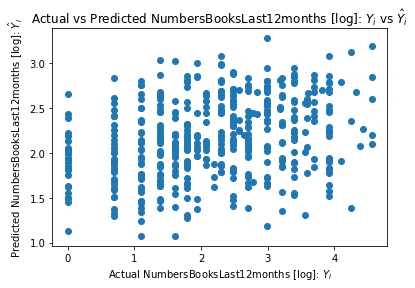

In [168]:
y_pred_gbreg = gbreg.predict(X_test)

plt.scatter(y_test['NumbersBooksLast12months'], y_pred_gbreg)

plt.xlabel("Actual NumbersBooksLast12months [log]: $Y_i$")
plt.ylabel("Predicted NumbersBooksLast12months [log]: $\hat{Y}_i$")
plt.title("Actual vs Predicted NumbersBooksLast12months [log]: $Y_i$ vs $\hat{Y}_i$")

In [169]:
mse_gbreg = sklearn.metrics.mean_squared_error(y_test['NumbersBooksLast12months'], y_pred_gbreg)
print(mse_gbreg)

1.123167606697459


In [170]:
print(gbreg.score(X_train, y_train['NumbersBooksLast12months']))
print(gbreg.score(X_test, y_test['NumbersBooksLast12months']))

0.2881179327358384
0.09668530754517002


#### (Reference: No stratify)

In [ ]:
"""
# default: learning_rate=0.1, n_estimators=100, max_depth=3
gbreg = GradientBoostingRegressor(learning_rate=0.1, random_state=0)
gbreg.fit(X_train, y_train)

scores_gbreg = cross_val_score(gbreg, X_train, y_train, cv=5)
print("Cross-validation scores (Random forest regression): {}".format(scores_gbreg))
print("Average cross-validation score (Random forest regression): {}".format(scores_gbreg.mean()))
"""

"""
Cross-validation scores (Random forest regression): [0.12710669 0.0781122  0.0397716  0.08072326 0.08960166]
Average cross-validation score (Random forest regression): 0.08306307944865066
"""

In [ ]:
"""
y_pred_gbreg = gbreg.predict(X_test)

plt.scatter(y_test['NumbersBooksLast12months'], y_pred_gbreg)

plt.xlabel("Actual NumbersBooksLast12months [log]: $Y_i$")
plt.ylabel("Predicted NumbersBooksLast12months [log]: $\hat{Y}_i$")
plt.title("Actual vs Predicted NumbersBooksLast12months [log]: $Y_i$ vs $\hat{Y}_i$")
"""

In [ ]:
"""
mse_gbreg = sklearn.metrics.mean_squared_error(y_test, y_pred_gbreg)
print(mse_gbreg)
"""

"""
1.0995882149988734
"""

In [ ]:
"""
print(gbreg.score(X_train, y_train))
print(gbreg.score(X_test, y_test))
"""

"""
0.28504920621572627
0.09906732590261258
"""

# Question 3: Printed books vs e-books vs audiobooks: Which contributes the most to the increased number of books to read?

Answer: e-books and audiobooks result in more number of books to read compared to printed books (although not with statistical confidence)

## Printed books

In [171]:
mean_printed_books = df.groupby(['PrintedBooksLast12months?']).mean()['NumbersBooksLast12months']

In [172]:
mean_printed_books

PrintedBooksLast12months?
Don’t know    17.000000
No             3.353047
Yes           19.958481
Name: NumbersBooksLast12months, dtype: float64

In [173]:
std_printed_books = df.groupby(['PrintedBooksLast12months?']).std()['NumbersBooksLast12months']

In [174]:
std_printed_books

PrintedBooksLast12months?
Don’t know    20.607442
No             9.364689
Yes           24.916406
Name: NumbersBooksLast12months, dtype: float64

<AxesSubplot:xlabel='PrintedBooksLast12months?'>

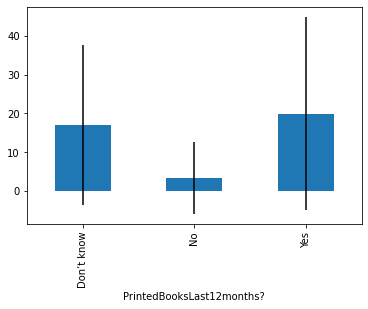

In [175]:
mean_printed_books.plot(kind="bar", yerr=std_printed_books)

## e-books

In [176]:
mean_e_books = df.groupby(['E-booksLast12months?']).mean()['NumbersBooksLast12months']

In [177]:
mean_e_books

E-booksLast12months?
Don’t know    15.428571
No            13.359921
Yes           25.256671
Name: NumbersBooksLast12months, dtype: float64

In [178]:
std_e_books = df.groupby(['E-booksLast12months?']).std()['NumbersBooksLast12months']

In [179]:
std_e_books

E-booksLast12months?
Don’t know    26.246507
No            21.573929
Yes           26.379356
Name: NumbersBooksLast12months, dtype: float64

<AxesSubplot:xlabel='E-booksLast12months?'>

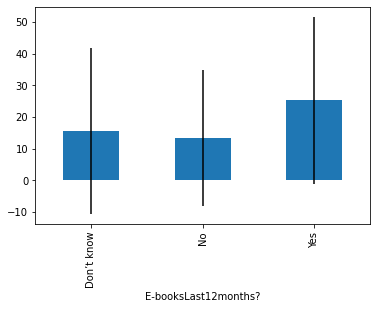

In [180]:
mean_e_books.plot(kind="bar", yerr=std_e_books)

## audiobooks

In [181]:
mean_audiobooks = df.groupby(['AudiobooksLast12months?']).mean()['NumbersBooksLast12months']

In [182]:
mean_audiobooks

AudiobooksLast12months?
Don’t know    34.250000
No            15.081506
Yes           25.883212
Name: NumbersBooksLast12months, dtype: float64

In [183]:
std_audiobooks = df.groupby(['AudiobooksLast12months?']).std()['NumbersBooksLast12months']

In [184]:
std_audiobooks

AudiobooksLast12months?
Don’t know    43.469338
No            22.444366
Yes           27.766114
Name: NumbersBooksLast12months, dtype: float64

<AxesSubplot:xlabel='AudiobooksLast12months?'>

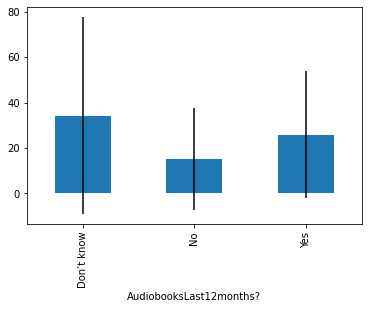

In [185]:
mean_audiobooks.plot(kind="bar", yerr=std_audiobooks)

## Compare them

In [186]:
mean_printed_books.tail(1)

PrintedBooksLast12months?
Yes    19.958481
Name: NumbersBooksLast12months, dtype: float64

In [187]:
mean_e_books.tail(1)

E-booksLast12months?
Yes    25.256671
Name: NumbersBooksLast12months, dtype: float64

In [188]:
mean_audiobooks.tail(1)

AudiobooksLast12months?
Yes    25.883212
Name: NumbersBooksLast12months, dtype: float64

In [189]:
mean_combined = pd.concat([mean_printed_books.tail(1), mean_e_books.tail(1), mean_audiobooks.tail(1)])

In [190]:
mean_combined

Yes    19.958481
Yes    25.256671
Yes    25.883212
Name: NumbersBooksLast12months, dtype: float64

In [191]:
std_combined = pd.concat([std_printed_books.tail(1), std_e_books.tail(1), std_audiobooks.tail(1)])

In [192]:
std_combined

Yes    24.916406
Yes    26.379356
Yes    27.766114
Name: NumbersBooksLast12months, dtype: float64

In [193]:
mean_combined.set_axis(
    ['PrintedBooksLast12months?_Yes', 'E-booksLast12months?_Yes', 'AudiobooksLast12months?_Yes']
    , axis=0, inplace=True)

In [194]:
mean_combined

PrintedBooksLast12months?_Yes    19.958481
E-booksLast12months?_Yes         25.256671
AudiobooksLast12months?_Yes      25.883212
Name: NumbersBooksLast12months, dtype: float64

In [195]:
std_combined.set_axis(
    ['PrintedBooksLast12months?_Yes', 'E-booksLast12months?_Yes', 'AudiobooksLast12months?_Yes']
    , axis=0, inplace=True)

In [196]:
std_combined

PrintedBooksLast12months?_Yes    24.916406
E-booksLast12months?_Yes         26.379356
AudiobooksLast12months?_Yes      27.766114
Name: NumbersBooksLast12months, dtype: float64

<AxesSubplot:>

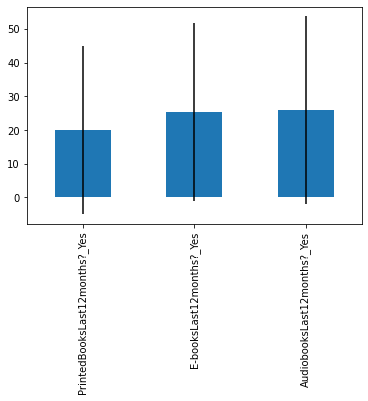

In [197]:
# 'PrintedBooksLast12months?_Yes', 'E-booksLast12months?_Yes', 'AudiobooksLast12months?_Yes'
mean_combined.plot(kind="bar", yerr=std_combined)

# Question 4: How do the book lovers look like?

Answer: Compared to the entire dataset, book lovers (i.e. who read more than 70 books within the dataset) have the following characteristics.

- more eldery people
- more female
- more white
- no significant difference as for marital status
- less high school incomplete/graduate, more college/post-graduate training etc.
- more retired/self-employed, less full-time

In [198]:
number_books_vals.sort_index(ascending=False)

97    124
96     15
90      2
84      1
80      6
76      1
75     14
70     10
67      1
65      2
60     19
55      3
54      1
52      2
51      1
50    108
48      5
47      2
45      7
43      1
42      1
40     53
38      1
37      1
36     16
35     15
32      3
30    109
26      2
25     82
24     35
23      1
22      1
20    159
19      1
18     10
17      6
16     11
15    103
14      9
13     12
12    159
11      4
10    162
9      11
8      69
7      49
6     172
5     167
4     166
3     209
2     169
1     149
0     390
Name: NumbersBooksLast12months, dtype: int64

In [199]:
df_book_lovers = df[df['NumbersBooksLast12months'] > 70]

In [200]:
df_book_lovers

,Age,Sex,Race,MaritalStatus,Education,Employment,Income,NumbersBooksLast12months,PrintedBooksLast12months?,AudiobooksLast12months?,E-booksLast12months?,HowReadLastBook,ReadNewspapers?,ReadMagazines?
0,66,Male,Refused,Divorced,College graduate,Retired,"4 - $20,000 to under $30,000",97,Yes,No,Yes,Purchased the book,No,Yes
1,46,Male,Native American/American Indian,Married,High school graduate,Employed full-time,"2 - Less than $10,000",97,Yes,Yes,Yes,Purchased the book,Yes,Yes
2,32,Male,Mixed race,Never been married,High school graduate,Employed full-time,"2 - Less than $10,000",97,No,Yes,Yes,Borrowed the book from a friend or family member,Yes,Yes
3,27,Male,Mixed race,Married,High school graduate,Employed full-time,"6 - $40,000 to under $50,000",97,Yes,No,Yes,Borrowed the book from a library,Yes,No
4,16,Female,Mixed race,Never been married,High school incomplete,Employed part-time,"3 - $10,000 to under $20,000",97,Yes,Yes,No,Purchased the book,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,55,Female,White,Widowed,College graduate,Employed full-time,"6 - $40,000 to under $50,000",75,Yes,No,No,Got the book some other way,Yes,No
159,48,Female,White,Married,College graduate,Not employed for pay,"9 - $100,000 to under $150,000",75,Yes,Yes,No,Borrowed the book from a friend or family member,Yes,Yes
160,48,Male,White,Never been married,Post-graduate training/professional school aft...,Employed full-time,"7 - $50,000 to under $75,000",75,Yes,No,Yes,Purchased the book,Yes,Yes
161,45,Female,White,Never been married,Post-graduate training/professional school aft...,Employed full-time,1 - Refused,75,Yes,Yes,Yes,Borrowed the book from a library,Yes,Yes


## distribution


Text(0.5, 1.0, 'Age: book lovers')

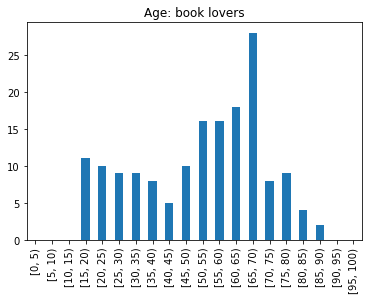

In [201]:
"""
age_vals_book_lovers = df_book_lovers['Age'].value_counts()

(age_vals_book_lovers/df_book_lovers.shape[0]).plot(kind="bar")
plt.title("Age: book lovers")
"""

pd.cut(df_book_lovers['Age'], range(0, 101, 5), right=False).value_counts(sort=False).plot.bar()
plt.title("Age: book lovers")

Text(0.5, 1.0, 'Sex: book lovers')

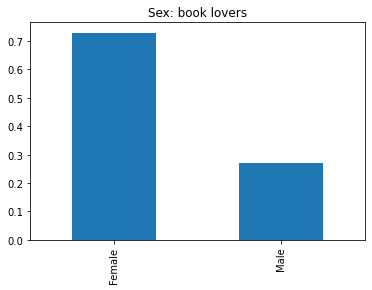

In [202]:
sex_vals_book_lovers = df_book_lovers['Sex'].value_counts()

(sex_vals_book_lovers/df_book_lovers.shape[0]).plot(kind="bar")
plt.title("Sex: book lovers")

Text(0.5, 1.0, 'Race: book lovers')

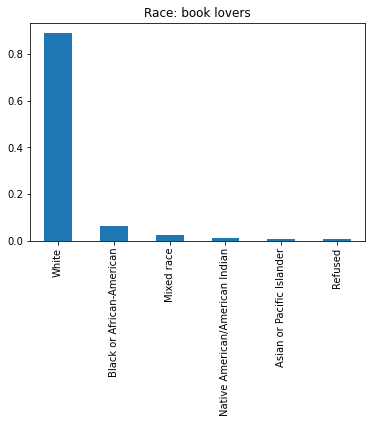

In [203]:
race_vals_book_lovers = df_book_lovers['Race'].value_counts()

(race_vals_book_lovers/df_book_lovers.shape[0]).plot(kind="bar")
plt.title("Race: book lovers")

Text(0.5, 1.0, 'Marital status: book lovers')

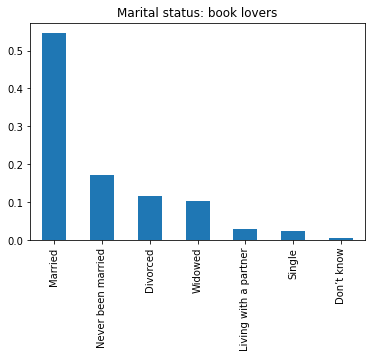

In [204]:
marital_vals_book_lovers = df_book_lovers['MaritalStatus'].value_counts()

(marital_vals_book_lovers/df_book_lovers.shape[0]).plot(kind="bar")
plt.title("Marital status: book lovers")

Text(0.5, 1.0, 'Education: book lovers')

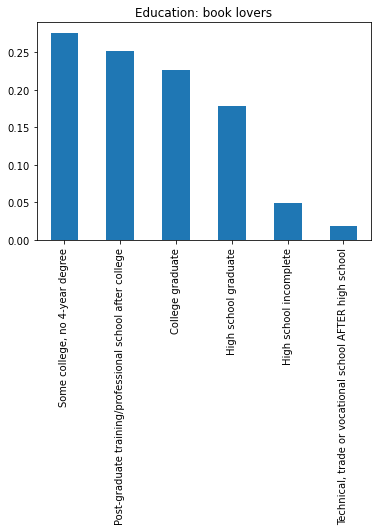

In [205]:
education_vals_book_lovers = df_book_lovers['Education'].value_counts()

(education_vals_book_lovers/df_book_lovers.shape[0]).plot(kind="bar")
plt.title("Education: book lovers")

Text(0.5, 1.0, 'Employment: book lovers')

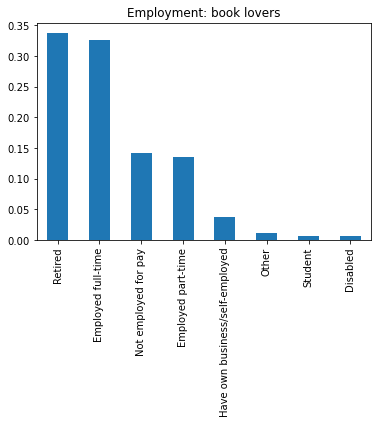

In [206]:
employment_vals_book_lovers = df_book_lovers['Employment'].value_counts()

(employment_vals_book_lovers/df_book_lovers.shape[0]).plot(kind="bar")
plt.title("Employment: book lovers")

Text(0.5, 1.0, 'Income: book lovers')

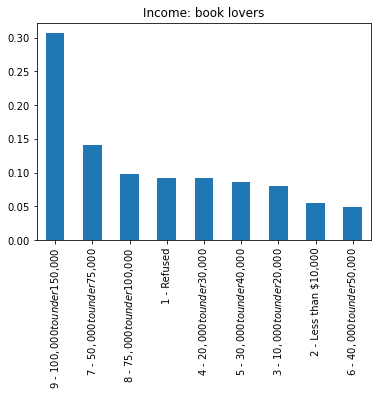

In [207]:
income_vals_book_lovers = df_book_lovers['Income'].value_counts()

(income_vals_book_lovers/df_book_lovers.shape[0]).plot(kind="bar")
plt.title("Income: book lovers")